In [1]:
import sys
import os
path_helper = ["c:\\","Users","vfriedrich","projects","gating","reproducibility_cleaned","helper"]
sys.path.append(os.path.join(*path_helper))
import helper_reproducibility as hr
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import os
import re
import json
from pywget import wget
from matplotlib_venn import venn2
from matplotlib_venn import venn2_circles
from matplotlib_venn import venn3
from matplotlib_venn import venn3_circles
print(sys.executable)

C:\Users\vfriedrich\Anaconda3\envs\gating_env_local_parameter_option\python.exe


In [2]:
pre = 'summary_01v2'
start_time = hr.get_time()

In [3]:
path_output_data = hr.return_output_data_path()
path_output_script = os.path.join(path_output_data,pre)
hr.make_path(os.path.join(path_output_script))

path exists


### CITEseq

In [4]:
path_CITEseq_obj = os.path.join('C:\\Users\\vfriedrich\\projects\\gating\\reproducibility_cleaned\\main_Figure_bridge_gap','CITEseq','output_data','pdata_CD16_CD4_sub_denoised.h5ad') 

In [5]:
adata_CITEseq = sc.read_h5ad(path_CITEseq_obj)
AB_CITEseq = list(adata_CITEseq.var.index)

In [6]:
prefix_to_remove = 'AB_'
for i in range(len(AB_CITEseq)):
    if AB_CITEseq[i].startswith(prefix_to_remove):
        AB_CITEseq[i] = AB_CITEseq[i][len(prefix_to_remove):]

### CyTOF

In [7]:
AB_cytof = ['CD45',
       'CD3', 'CD19', 'CD15', 'CD8', 'TCRgd', 'CD62L', 'CD45RO', 'CD28',
       'CD27', 'CD226', 'ICOS', 'PD1', 'Lag3', 'TIGIT', 'CD96', 'CD25', 'CD56',
       'HLADR', 'CD38', 'CD137', 'CD69', 'Ki67', 'CXCR3', 'CXCR5', 'CCR6',
       'CRTH2', 'KLRB1', 'KLRG1', 'KLRF1', 'CD95', 'CD10', 'CD16', 'CD34',
       'CD123', 'CD11c', 'CD21', 'CD14', 'IgD', 'IgM']

In [8]:
intersect_AB = list(set(AB_cytof) & set(AB_CITEseq))

In [9]:
#save for CyTOF
with open(os.path.join(path_output_script,pre + '_intersect_AB_cytof.json'), 'w') as f:
    json.dump(intersect_AB, f)
#save for CITEseq
intersect_AB_CITEseq = ['AB_' + item for item in intersect_AB]
with open(os.path.join(path_output_script,pre + '_intersect_AB_citeseq.json'), 'w') as f:
    json.dump(intersect_AB_CITEseq, f)

### FACS

FACS - CITEseq

In [10]:
AB_FACS = ['CD56', 'CD3', 'CD11c', 'Siglec8', 'CEACAM8', 'CD14', 'CD203c', 'CD1c','CD19', 'HLA-DR', 'CD4', 'LD', 'CD16', 'CD45', 'CD8']
#renaming 'CD66b' - 'CEACAM8' 

In [11]:
intersect_FACS_CITEseq = list(set(AB_FACS) & set(AB_CITEseq))
intersect_FACS_CITEseq_AB = ['AB_' + item for item in intersect_FACS_CITEseq]

In [12]:
with open(os.path.join(path_output_script,pre + '_intersect_AB_citeseq_FACS.json'), 'w') as f:
    json.dump(intersect_FACS_CITEseq_AB , f)

FACS - CyTOF

In [13]:
intersect_FACS_cytof = list(set(AB_FACS) & set(AB_cytof))

In [14]:
with open(os.path.join(path_output_script,pre + '_intersect_AB_cytof_FACS.json'), 'w') as f:
    json.dump(intersect_FACS_cytof, f)

## Visualize

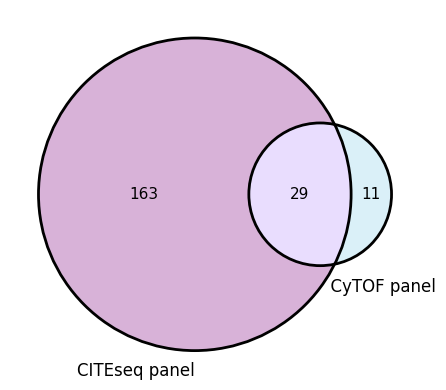

In [15]:
plt.figure()
out = venn2([set(AB_CITEseq), set(AB_cytof)],set_labels = ('CITEseq panel', '  CyTOF panel'), alpha = 0.3,set_colors=('purple', 'skyblue'))
venn2_circles([set(AB_CITEseq), set(AB_cytof)])
for text in out.set_labels:
    text.set_fontsize(12)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(11)
plt.savefig(os.path.join(path_output_script,pre + '_venn_.CITEseq_vs_FACS.pdf'),dpi = 300)
plt.show()

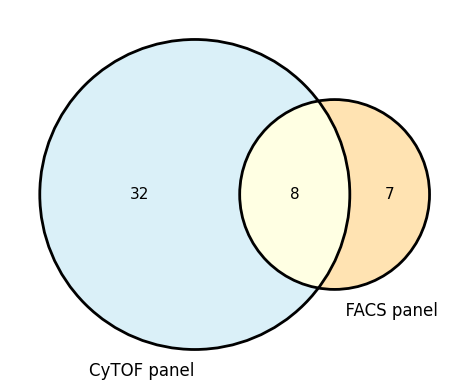

In [16]:
plt.figure()
out = venn2([set(AB_cytof), set(AB_FACS)],set_labels = ('CyTOF panel', '  FACS panel'), alpha = 0.3,set_colors=('skyblue', 'orange'))
venn2_circles([set(AB_cytof), set(AB_FACS)])
for text in out.set_labels:
    text.set_fontsize(12)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(11)
plt.savefig(os.path.join(path_output_script,pre + '_venn_CyTOF_vs_FACS.pdf'),dpi = 300)
plt.show()

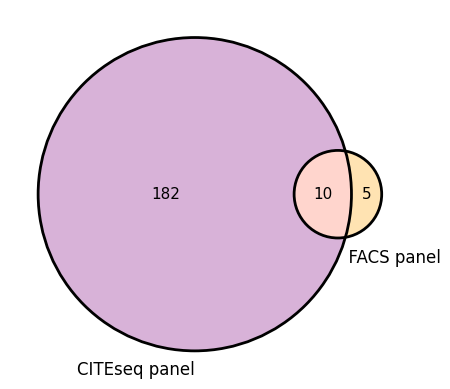

In [17]:
plt.figure()
out = venn2([set(AB_CITEseq), set(AB_FACS)],set_labels = ('CITEseq panel', '  FACS panel'), alpha = 0.3,set_colors=('purple', 'orange'))
venn2_circles([set(AB_CITEseq), set(AB_FACS)])
for text in out.set_labels:
    text.set_fontsize(12)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(11)
plt.savefig(os.path.join(path_output_script,pre + '_venn_CITEseq_vs_FACS.pdf'),dpi = 300)
plt.show()

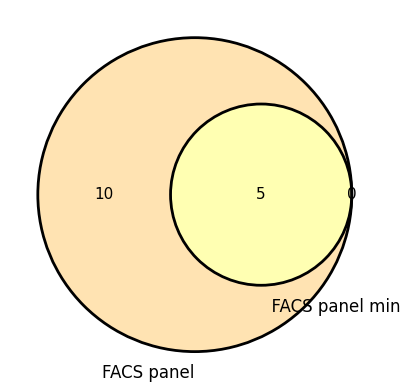

In [18]:
AB_FACS_min = ['CD3','CD4','CD8','CD16','HLA-DR']
plt.figure()
out = venn2([set(AB_FACS), set(AB_FACS_min)],set_labels = ('FACS panel', '  FACS panel min'), alpha = 0.3,set_colors=('orange','yellow' ))
venn2_circles([set(AB_FACS), set(AB_FACS_min)])
for text in out.set_labels:
    text.set_fontsize(12)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(11)
plt.savefig(os.path.join(path_output_script,pre + '_venn_FACS_vs_FACS_min.pdf'),dpi = 300)
plt.show()

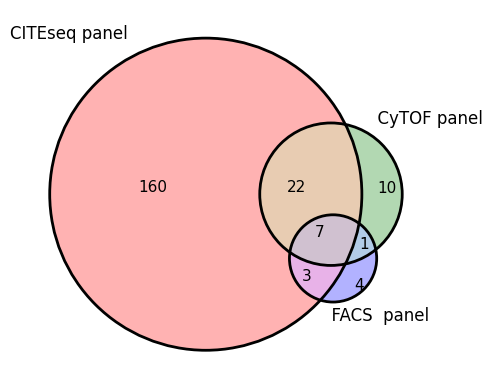

In [19]:
out = venn3([set(AB_CITEseq), set(AB_cytof),set(AB_FACS)],set_labels = ('CITEseq panel', '  CyTOF panel','                  FACS  panel'), alpha = 0.3)
venn3_circles([set(AB_CITEseq), set(AB_cytof),set(AB_FACS)])
for text in out.set_labels:
    text.set_fontsize(12)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(11)
plt.savefig(os.path.join(path_output_script,pre + '_venn_FACS_vs_CyTOF_vs_CITEseq.pdf'),dpi = 300)
plt.show()

In [20]:
hr.save_package_versions(hr.return_base_package_version_path(),pre = pre,do_print = True)
sc.logging.print_versions()
end_time = hr.get_time()
hr.get_time_delta(start_time,end_time,pre=pre,save=True)

babel==2.13.1
qtpy==2.4.1
sqlalchemy==2.0.23
send2trash==1.8.2
anyio==4.1.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fqdn==1.5.1
greenlet==3.0.1
idna==3.6
importlib-metadata==7.0.0
ipykernel==6.27.1
ipython==8.18.1
ipython-genutils==0.2.0
ipython-sql==0.5.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.2
jupyter==1.0.0
jupyter-client==8.6.0
jupyter-console==6.6.3
jupyter-core==5.5.0
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter-server==2.11.2
jupyter-server-terminals==0.4.4
jupyterlab==4.0.9
jupyterlab-pygments==0.3.0
jupyterlab-server==2.25.2
jupyterlab-widgets==3.0.9
matplotlib-inline==0.1.6


datetime.timedelta(seconds=4, microseconds=925821)